In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
raw_data = pd.read_csv("Patient_no_show_raw.csv")
print(raw_data.shape)
raw_data.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# get the count of unique values in each column
print("__________________ Unique Values ______________")
for col in raw_data.columns:
    print(col, raw_data[col].nunique())

# get the null values in each column
print("__________________ Null Values ______________")
for col in raw_data.columns:
    print(col, raw_data[col].isnull().sum())

__________________ Unique Values ______________
PatientId 62299
AppointmentID 110527
Gender 2
ScheduledDay 103549
AppointmentDay 27
Age 104
Neighbourhood 81
Scholarship 2
Hipertension 2
Diabetes 2
Alcoholism 2
Handcap 5
SMS_received 2
No-show 2
__________________ Null Values ______________
PatientId 0
AppointmentID 0
Gender 0
ScheduledDay 0
AppointmentDay 0
Age 0
Neighbourhood 0
Scholarship 0
Hipertension 0
Diabetes 0
Alcoholism 0
Handcap 0
SMS_received 0
No-show 0


In [13]:
# get the data types of each column
print("__________________ Data Types ______________")
for col in raw_data.columns:
    print(col, raw_data[col].dtype)

# identify the catergorical columns
print("__________________ Categorical Columns ______________")
categorical_columns = []
for col in raw_data.columns:
    if raw_data[col].dtype == 'object':
        categorical_columns.append(col)

print(categorical_columns)

__________________ Data Types ______________
PatientId float64
AppointmentID int64
Gender object
ScheduledDay object
AppointmentDay object
Age int64
Neighbourhood object
Scholarship int64
Hipertension int64
Diabetes int64
Alcoholism int64
Handcap int64
SMS_received int64
No-show object
__________________ Categorical Columns ______________
['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show']


In [14]:
# Make the waiting time as ScheduledDay - AppointmentDay in hours
raw_data['ScheduledDay'] = pd.to_datetime(raw_data['ScheduledDay'])
raw_data['AppointmentDay'] = pd.to_datetime(raw_data['AppointmentDay'])

raw_data['WaitingTime'] = (raw_data['AppointmentDay'] - raw_data['ScheduledDay']).dt.total_seconds() / 3600


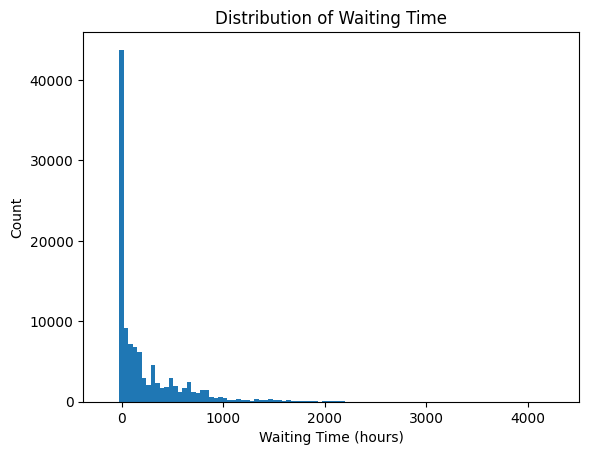

In [15]:

# print the distribution of the waiting time
plt.hist(raw_data['WaitingTime'], bins=100)
plt.xlabel('Waiting Time (hours)')
plt.ylabel('Count')
plt.title('Distribution of Waiting Time')
plt.show()

In [17]:
# print the unique values in handicap column
print(raw_data['Handcap'].unique())

# count the va;ues for each handicap value
print(raw_data['Handcap'].value_counts())



[0 1 2 3 4]
Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64


In [18]:
# remove the rows with handicap values greater than 1
raw_data = raw_data[raw_data['Handcap'] <= 1]
print(raw_data['Handcap'].unique())
print(raw_data['Handcap'].value_counts())

[0 1]
Handcap
0    108286
1      2042
Name: count, dtype: int64


(38491, 15)


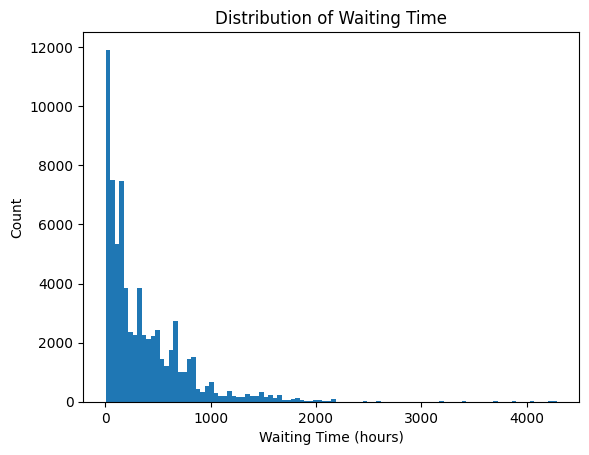

In [20]:
# count the amount of negative values in the waiting time
print(raw_data[raw_data['WaitingTime'] < 0].shape)

# remove the rows with negative waiting time and get them to another dataframe
negative_waiting_time = raw_data[raw_data['WaitingTime'] < 0]
raw_data = raw_data[raw_data['WaitingTime'] >= 0]

# print the distribution of the waiting time
plt.hist(raw_data['WaitingTime'], bins=100)
plt.xlabel('Waiting Time (hours)')
plt.ylabel('Count')
plt.title('Distribution of Waiting Time')
plt.show()

In [23]:
# Make a new data frame with the columns that we need
selected_columns = ["Gender","Age","WaitingTime" , "Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","No-show"]

selected_data = raw_data[selected_columns]

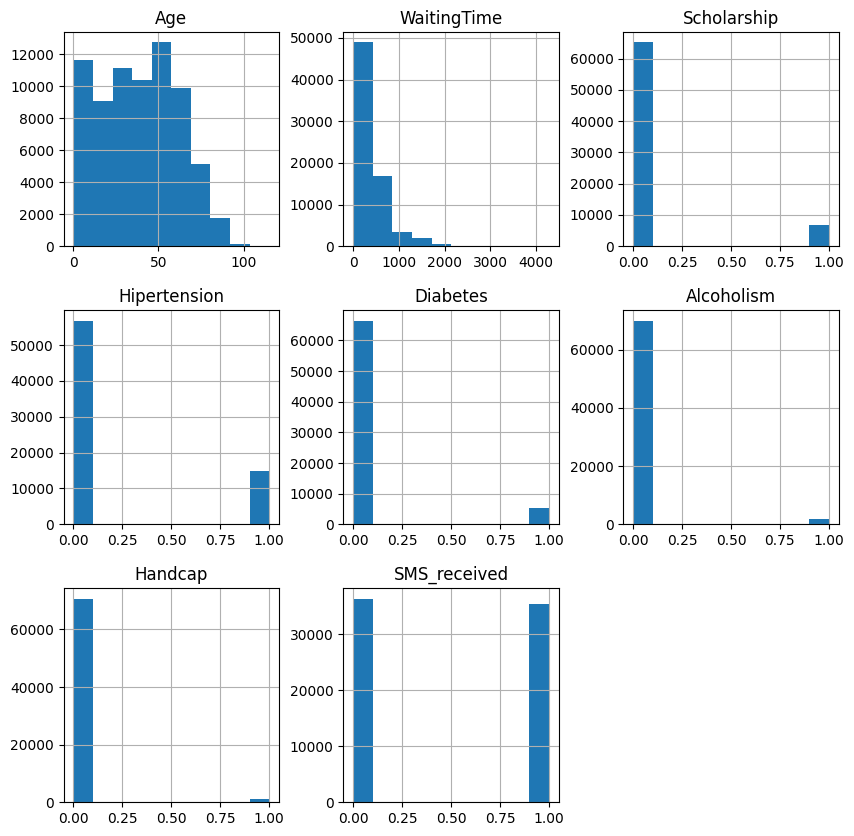

In [24]:
# visualize the data using pandas
selected_data.hist(figsize=(10,10))
plt.show()

In [25]:
# save the data to a new csv file
selected_data.to_csv("selected_data_for_patient_no_show.csv", index=False)
